# Identifying the Authors of Classic English Fiction Books

Given a text in English, we wish to perform a classification in predicting what author among several possible candidates wrote it. The writing styles of any two authors generally differs, and we hope to build a model that recognizes this difference in a consistent way. 
...label chunks of texts to one out of several possible candidate authors. The candidate authors are Charles Dickens, Jane Austen, Mark Twain (add more).


In [42]:
import pandas as pd
import csv
import os

# Data sources
- http://www.gutenberg.org/

# Data Retrieval

From gutenberg.org we wanted to retrieve as many texts as possible for each author. The website has +50 000 books, listed in very non-uniform manner in a catalog. 

Part i) Parsing the catalog, and retrieving the info for relevant books was a bit of a pain. * getting rid of books of other language, * getting rid of audiobooks, * taking care of formatting errors
Generated a CSV file with the columns 'title', 'author', 'book_id', and 'link'. V

Part ii) given the catalog, retrieve the texts
Manual work: delete the books that were in the wrong language, add some extra books that weren't retrieved successfully

In [31]:
df = pd.read_csv('data/books.csv')
df.columns = ['title','author','book_id', 'link']
df.head(10)

,title,author,book_id,link
0,Guild Court,George MacDonald,56176,http://www.gutenberg.org/cache/epub/56176/pg56...
1,Aventures d'Alice au pays des merveilles,Lewis Carroll,55456,http://www.gutenberg.org/files/55456/55456-0.txt
2,Uusi Odysseus,Jack London,55184,http://www.gutenberg.org/cache/epub/55184/pg55...
3,The Birthplace,Henry James,55078,http://www.gutenberg.org/files/55078/55078.txt
4,The Nursery Alice,Lewis Carroll,55040,http://www.gutenberg.org/files/55040/55040-0.txt
5,Kadonnut pikajuna,Arthur Conan Doyle,54933,http://www.gutenberg.org/cache/epub/54933/pg54...
6,Round the Fire Stories,Arthur Conan Doyle,54109,http://www.gutenberg.org/files/54109/54109-0.txt
7,Hearts of Three,Jack London,54068,http://www.gutenberg.org/files/54068/54068-0.txt
8,"Tarzan, apinain kuningas",Edgar Rice Burroughs,53984,http://www.gutenberg.org/cache/epub/53984/pg53...
9,Kauhun laakso II,Arthur Conan Doyle,52678,http://www.gutenberg.org/cache/epub/52678/pg52...


# Data Cleaning

<b> Text cleaning </b>

Stripping the texts. While we could have written a script to this manually, we decided against this solution. The reason for this is that the overhead text came in many different formats, of varying lengths. In some cases it was less than 20 lines, in other over 200 lines. With an automated approach, we would have had to take a non-trivial amount of actual text in many cases. While we don't know, we decided it's better to keep it as big as possible.

<b> Feature extraction </b>

Lexical features
   1) character specific features
   2) word specific features
Syntactic features
Structural features

- * n-grams
- pos n-grams
- sentence length
- * word length
- word richness
- function words
- punctuation

<b> Constructing an item row matrix </b>

<b> Splitting the data into training, test and evaluation sets </b>

Percentage split or K-fold cross-validation?

# Data visualization

# Book Frequency
The number of books we have for each author.

In [44]:
path = "data/texts_stripped/"
authors = os.listdir(path)
book_counts = []
for author in authors:
    book_counts.append(len(os.listdir(path + author)))
book_counts

[50, 17, 35, 24, 21, 37, 15, 60, 67, 50, 29, 42]

Text(0,0.5,'Number of Books')

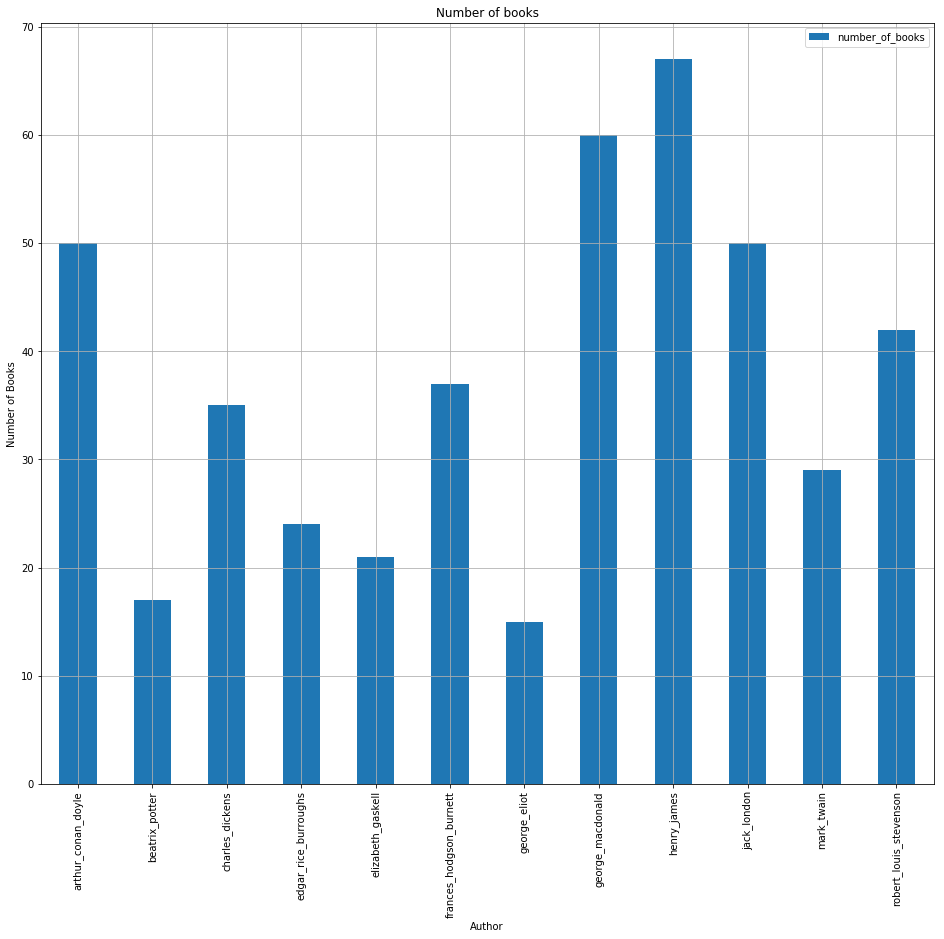

In [50]:
ax = pd.DataFrame( book_counts, index=authors, columns=['number_of_books'] ).plot(kind='bar', figsize=(16,14), title='Number of books', grid=True)
ax.set_xlabel("Author")
ax.set_ylabel("Number of Books")

# Word Length Distributions

In [ ]:
# N

In [ ]:
ax = the_freq_df.plot.scatter(x="years", y="the",figsize=(18,16), title='Years (1800-1900) percent of "the"')
ax.set_ylabel("% of \"the\" in book")
ax.set_xlabel("Year")

In [ ]:
the_freq_df["years"].corr(the_freq_df["the"])

As seen in the correlation, there is almost no correlation between year and % of "the".